In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from utils import abs_listdir

In [6]:
csv_results = abs_listdir('results/kernels/')

In [7]:
df = pd.read_csv(csv_results[1])
df

,node type,start,first,avg_ms,%,cdf%,mem KB,times called,name
0,CONV_2D,0.00000,10.716,9.46698,32.3717%,32.3717%,0,1,[sequential_12/conv2d_48/Conv2D]:0
1,PAD,9.46744,0.210,0.21614,0.739076%,33.1108%,0,1,[sequential_12/zero_padding2d_48/Pad]:1
2,MAX_POOL_2D,9.68390,1.322,1.43016,4.89033%,38.0011%,0,1,[sequential_12/max_pooling2d_48/MaxPool]:2
3,CONV_2D,11.11450,7.404,7.58990,25.9531%,63.9542%,0,1,[sequential_12/conv2d_49/Conv2D]:3
4,PAD,18.70490,0.100,0.10232,0.349876%,64.3041%,0,1,[sequential_12/zero_padding2d_49/Pad]:4
5,MAX_POOL_2D,18.80760,0.398,0.41418,1.41626%,65.7204%,0,1,[sequential_12/max_pooling2d_49/MaxPool]:5
6,CONV_2D,19.22210,5.240,5.54472,18.9598%,84.6801%,0,1,[sequential_12/conv2d_50/Conv2D]:6
7,PAD,24.76730,0.041,0.05174,0.176921%,84.8571%,0,1,[sequential_12/zero_padding2d_50/Pad]:7
8,MAX_POOL_2D,24.81930,0.122,0.13296,0.454647%,85.3117%,0,1,[sequential_12/max_pooling2d_50/MaxPool]:8
9,CONV_2D,24.95280,4.104,4.17084,14.2619%,99.5736%,0,1,[sequential_12/conv2d_51/Conv2D]:9


In [8]:
dfs = {os.path.split(r)[1] : pd.read_csv(r) for r in csv_results}
conv_time_total = {}
padding_time_total = {}
kernel_size = {}

for filename, df in dfs.items():
    # convolution statistics
    df_convs = df[df['node type'].apply(lambda s: 'CONV' in s)]
    conv_time_total[filename] = df_convs[' avg_ms'].sum()

    # kernel size
    ks = filename.split('_')[2:4]
    ks = (int(ks[0]), int(ks[1]))
    kernel_size[filename] = ks

result = pd.DataFrame({'kernel_size': kernel_size,
                       'conv_time_total': conv_time_total})
result.sort_index(inplace=True)
result

,kernel_size,conv_time_total
kernel_size_1_1_benchmark.csv,"(1, 1)",1.940914
kernel_size_2_2_benchmark.csv,"(2, 2)",5.359588
kernel_size_3_3_benchmark.csv,"(3, 3)",10.332360
kernel_size_4_4_benchmark.csv,"(4, 4)",18.889680
kernel_size_5_5_benchmark.csv,"(5, 5)",26.772440
kernel_size_6_6_benchmark.csv,"(6, 6)",40.019680
kernel_size_7_7_benchmark.csv,"(7, 7)",46.114880
kernel_size_8_8_benchmark.csv,"(8, 8)",69.101180
kernel_size_9_9_benchmark.csv,"(9, 9)",85.266600


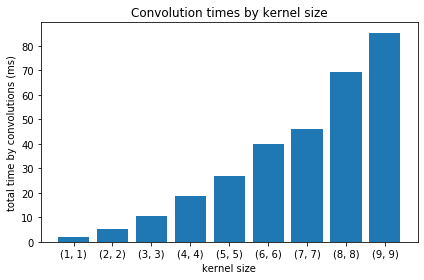

In [9]:
fig, ax = plt.subplots()

ax.set_ylabel('total time by convolutions (ms)')
ax.set_title('Convolution times by kernel size')
ax.set_xlabel('kernel size')


x = np.arange(len(result))
ax.bar(x, result['conv_time_total'])
xlabels = [str(s) for s in result['kernel_size']]
ax.set_xticks(x)
ax.set_xticklabels(xlabels)


fig.tight_layout()
plt.show()